In [166]:
'''Dataset : https://www.kaggle.com/datasets/mishra5001/credit-card
Lo que se busca análizar y predecir en esta base de datos son los casos de fraude, llamamos fraude a personas
que no pagan sus préstamos a tiempo'''



'''El primer paso es importar las librerías necesarias'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [167]:
'''Como segundo paso vemos el Dataset y análizamos las variables'''
df = pd.read_csv(r'C:\Users\julia\Downloads\application_data.csv')
print(df.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [168]:
print('Cantidad de datos: '+str(df.shape[0])+'\nCantidad de variables: '+str(df.shape[1]))

Cantidad de datos: 307511
Cantidad de variables: 122


In [169]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [170]:
'''Observamos que existen 65 variables de números continuos, 41 de números discretos y 16 variables de tipo string'''

'Observamos que existen 65 variables de números continuos, 41 de números discretos y 16 variables de tipo string'

In [171]:
'''Eliminamos registros duplicados (si los hay)'''
df.duplicated().sum()

0

In [172]:
'''Eliminamos variables que no tendrán impacto en nuestro análisis'''
df.drop(columns=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','SK_ID_CURR'], inplace=True)


MODE_cols = [col for col in df.columns if '_MODE' in col]
df.drop(columns = MODE_cols,inplace=True)
MEDI_cols = [col for col in df.columns if '_MEDI' in col]
df.drop(columns = MEDI_cols,inplace=True)
AVG_cols = [col for col in df.columns if '_AVG' in col]
df.drop(columns = AVG_cols,inplace=True)

temp=df.filter(regex='^FLAG_DOCUMENT',axis=1)
df.drop(columns=temp.columns,inplace=True)

In [173]:
print('Cantidad de datos: '+str(df.shape[0])+'\nCantidad de variables: '+str(df.shape[1]))

Cantidad de datos: 307511
Cantidad de variables: 48


In [174]:
'''Observemos los valores nulos de nuestro dataset'''
Missing_values = df.isna().sum()/len(df)
Missing_values.sort_values(ascending=False)

OWN_CAR_AGE                    0.659908
EXT_SOURCE_1                   0.563811
OCCUPATION_TYPE                0.313455
EXT_SOURCE_3                   0.198253
AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
NAME_TYPE_SUITE                0.004201
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
REG_REGION_NOT_LIVE_REGION     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000


In [175]:
'''En este caso, eliminaré aquellos que tenga más de un 32% de datos faltantes, ya que la variable Occupation_Type puede ser de
interés aunque la variable EXT_SOURCE_1 también es importante, en este caso la eliminaré ya que tengo 2 datos parecidos y
dejar la variable implicaria eliminar un 57% de los datos'''
Cols=list(Missing_values[(Missing_values<0.32)].index)
df = df[Cols]

In [176]:
'''Eliminamos filas con datos nulos, si bien son 140.000 filas, considero que 170.000 datos sigue siendo una cantidad de datos
apropiados'''
df = df.dropna()
df.shape

(167732, 46)

In [177]:
'''Una vez preparado el Dataset, continuamos con el análisis univariado'''

'Una vez preparado el Dataset, continuamos con el análisis univariado'

Casos de no fraude: 153525
Casos de fraude: 14207


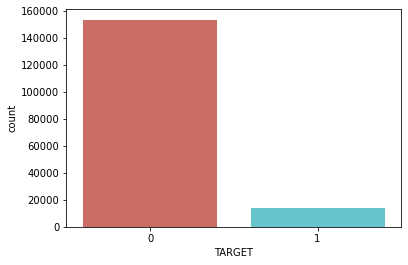

In [178]:
'''Comencemos con la variable Target'''

sns.countplot(x=df['TARGET'],data=df,palette='hls',tick_label = ['Fraude', 'No fraude'])

print('Casos de no fraude: ' + str(df['TARGET'].eq(0).sum()))
print('Casos de fraude: '+ str(df['TARGET'].eq(1).sum()))


In [179]:
'''Los casos de fraude solo son un 8,5%'''

'Los casos de fraude solo son un 8,5%'

In [180]:
'Las variables con pocos valores unicos serán los apropiados para visibilizar en este tipo de análisis'
df.nunique().sort_values()

TARGET                             2
NAME_CONTRACT_TYPE                 2
LIVE_CITY_NOT_WORK_CITY            2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_LIVE_CITY             2
LIVE_REGION_NOT_WORK_REGION        2
REG_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_LIVE_REGION         2
REGION_RATING_CLIENT_W_CITY        3
REGION_RATING_CLIENT               3
CODE_GENDER                        3
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_HOUSING_TYPE                  6
NAME_INCOME_TYPE                   6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
AMT_REQ_CREDIT_BUREAU_DAY          8
DEF_60_CNT_SOCIAL_CIRCLE           8
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_30_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_QRT          9
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
O

In [181]:
'''Para variables continuas debemos identificar outliers y removerlos'''

cols = df.select_dtypes('float').columns
len(cols)
df_num = df[cols]

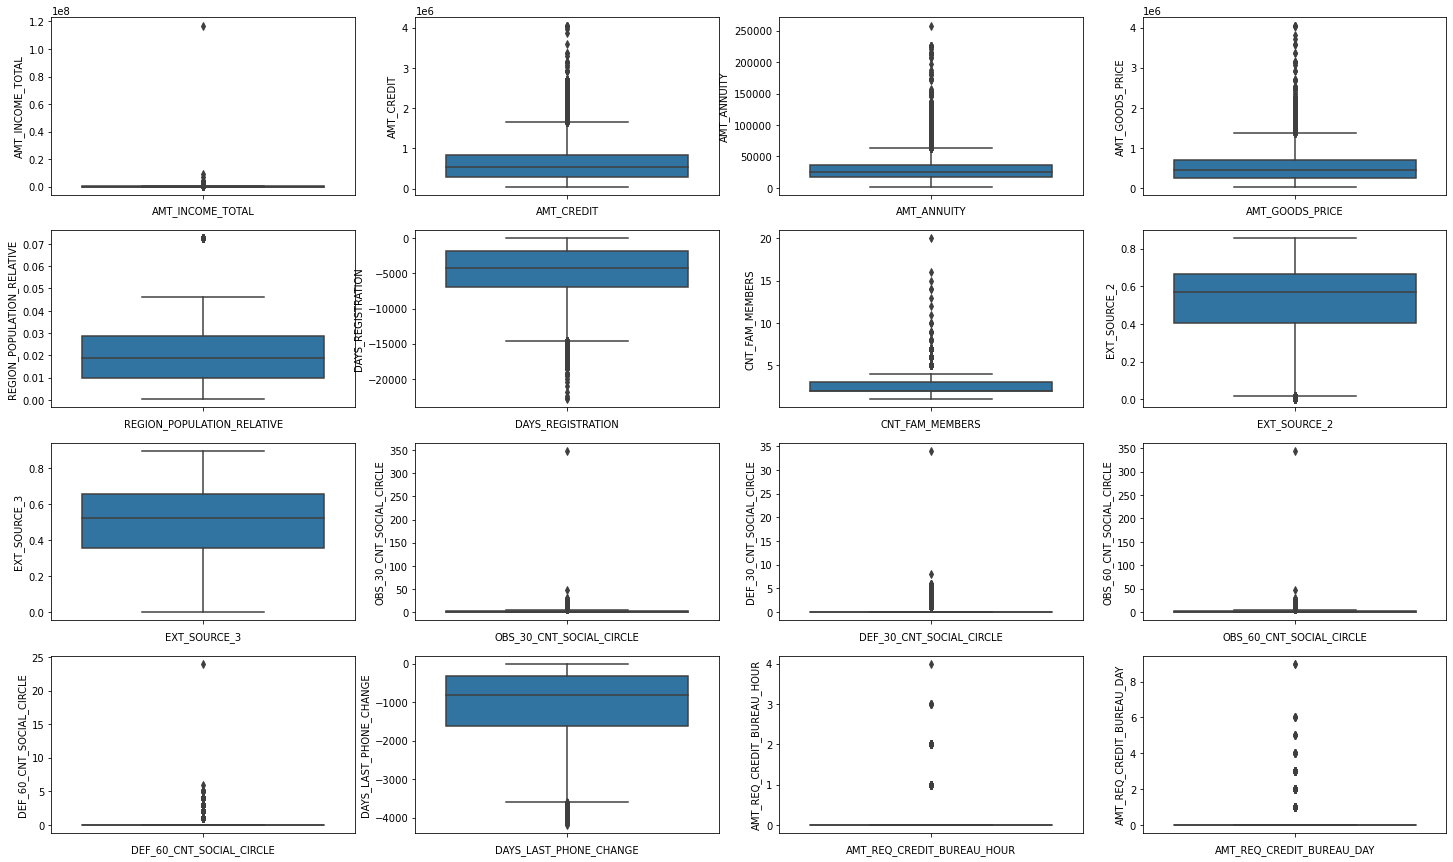

In [182]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(4, 4,
                            figsize = (25, 15))
x = 0
for i in range(0,4):
    for j in range(0,4):
        try:
            sns.boxplot(ax=axes[i, j], y=df[cols[x]])
            axes[i,j].set_xlabel(cols[x])
            x +=1
        except:
            pass

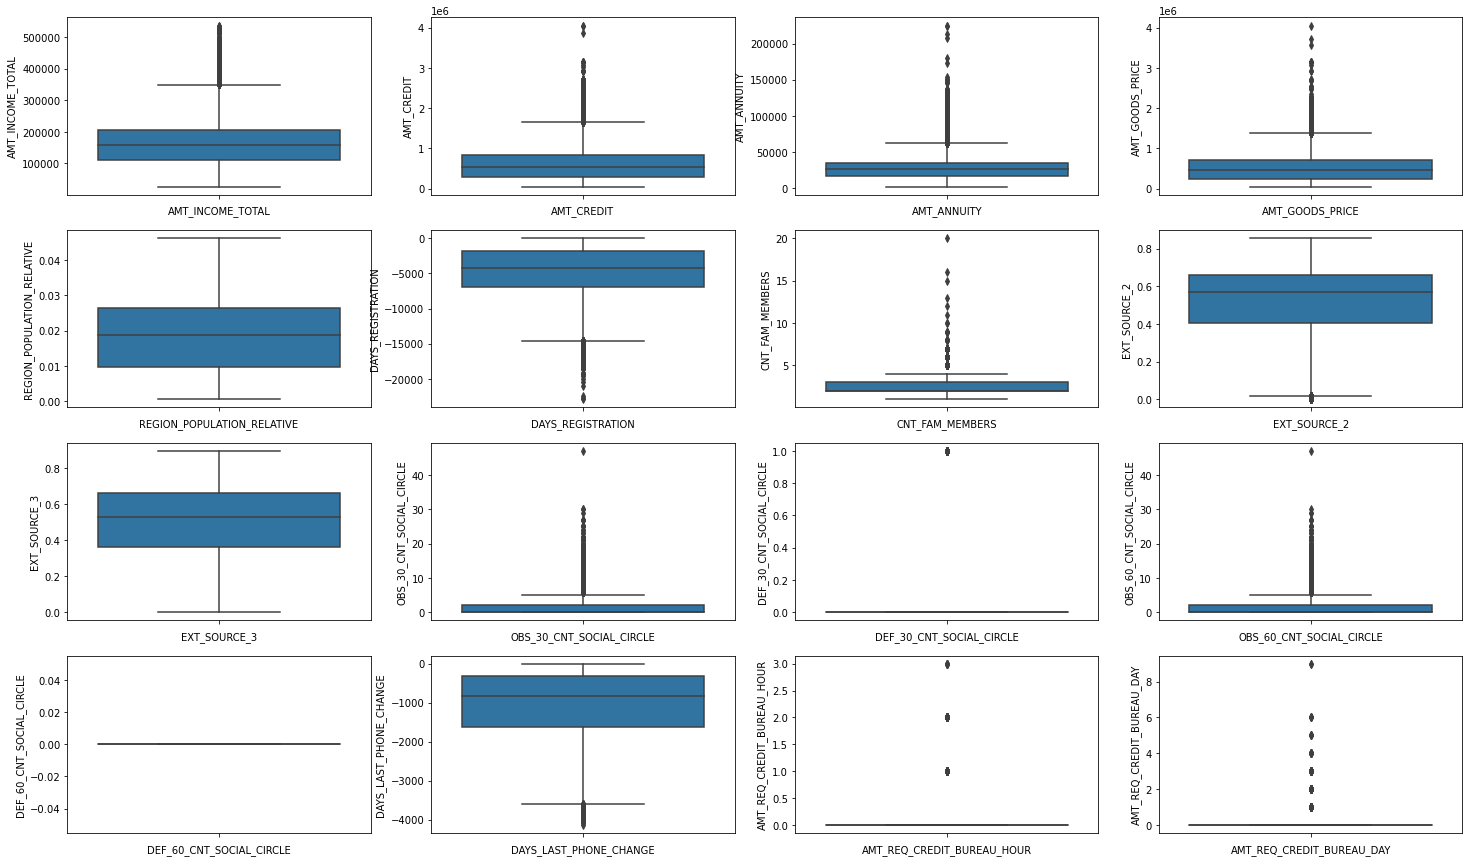

In [183]:
df=df[df.AMT_INCOME_TOTAL<np.nanpercentile(df['AMT_INCOME_TOTAL'], 99)]
df=df[df['REGION_POPULATION_RELATIVE']<np.nanpercentile(df['REGION_POPULATION_RELATIVE'], 99)]
df=df[df['DEF_30_CNT_SOCIAL_CIRCLE']<np.nanpercentile(df['DEF_30_CNT_SOCIAL_CIRCLE'], 99)]
df=df[df['DEF_60_CNT_SOCIAL_CIRCLE']<np.nanpercentile(df['DEF_60_CNT_SOCIAL_CIRCLE'], 99)]



import matplotlib.pyplot as plt
figure, axes = plt.subplots(4, 4,
                            figsize = (25, 15))
x = 0
for i in range(0,4):
    for j in range(0,4):
        try:
            sns.boxplot(ax=axes[i, j], y=df[cols[x]])
            axes[i,j].set_xlabel(cols[x])
            x +=1
        except:
            pass

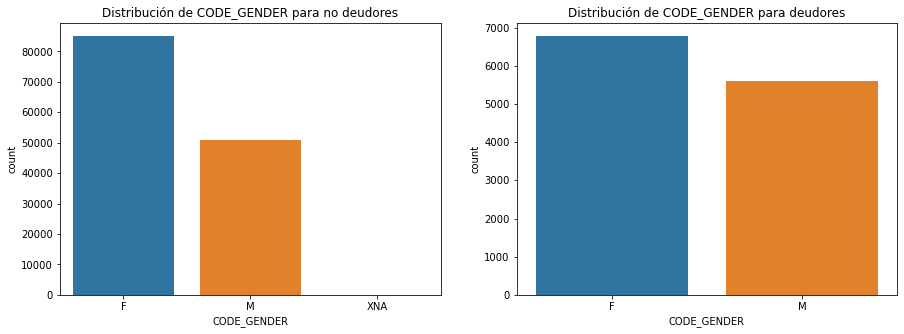

In [184]:
import seaborn as sns


'''Definiremos una función para realizar el análisis de las variables, lo que se hará es dividir las variables explicativas
según al target que pertenecen, es decir 0 o 1'''

 


default = df[df.TARGET==1]
nondefault = df[df.TARGET==0]

def var_graph(var, label_rotation):
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5))
    G1=sns.countplot(ax=ax1,x=nondefault[var], data=nondefault, order= nondefault[var].value_counts().index,)
    ax1.set_title('Distribución de '+'%s'%var +' para no deudores' )
    if(label_rotation):
        G1.set_xticklabels(G1.get_xticklabels(),rotation=45)
    G2=sns.countplot(ax=ax2,x=default[var], data=default, order= default[var].value_counts().index,)
    ax2.set_title('Distribución de '+'%s'%var +' para deudores' )
    if(label_rotation):
        G2.set_xticklabels(G1.get_xticklabels(),rotation=45)
    plt.show()
var_graph('CODE_GENDER', label_rotation=False)
#df = df[df['CODE_GENDER'] != 'XNA']  


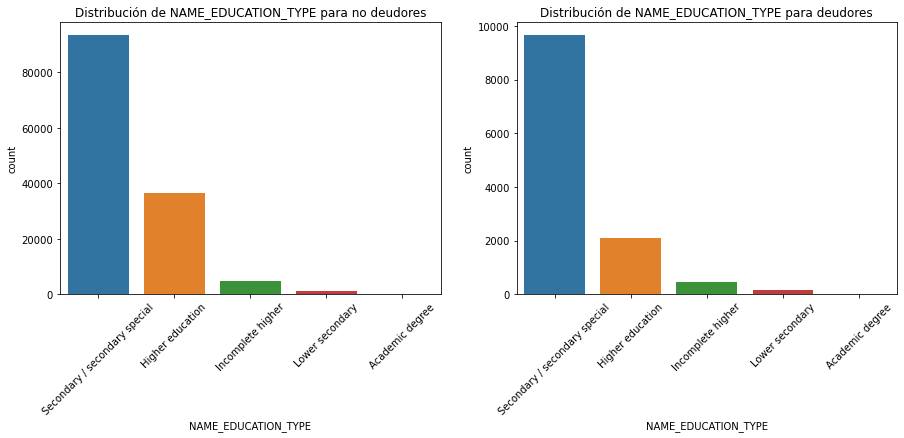

In [185]:
'''Podemos observar que las mujeres toman más prestamos, mientras los hombres son más propensos a defaultear un préstamo'''


var_graph('NAME_EDUCATION_TYPE', label_rotation = True)

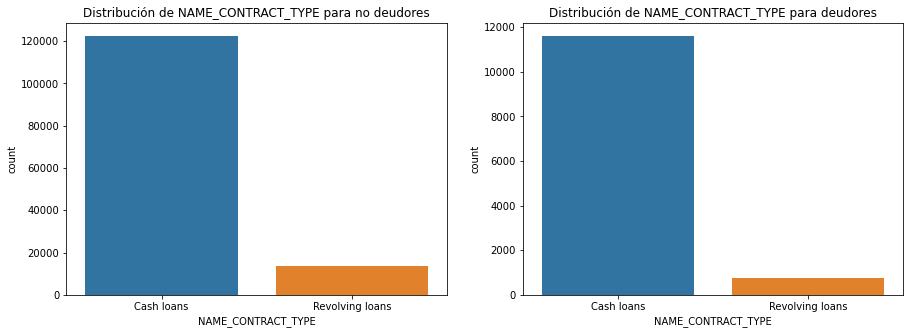

In [186]:
'''Aquí podemos observar que las personas en con educación: secundaria
son más propensos a pedir préstamos, y a su vez a defaultearlos'''


var_graph('NAME_CONTRACT_TYPE', label_rotation=False)

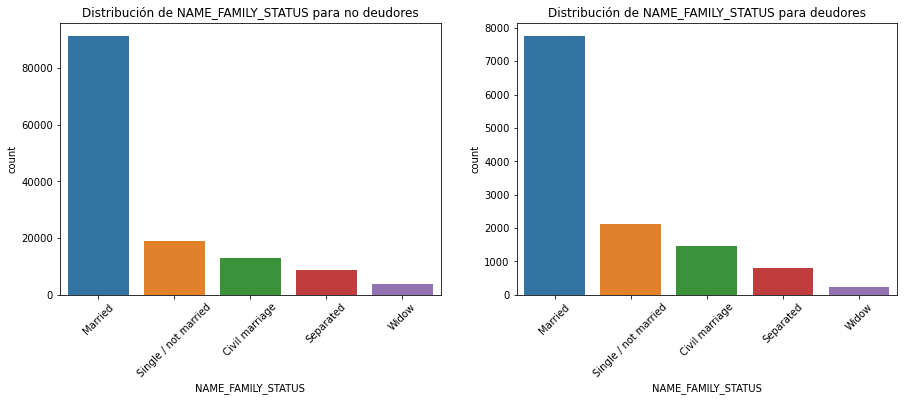

In [187]:
'''Aquí podemos observar que los créditos rotativos son los menos utilizados en el mercado y tiene porcentajes de default
similares a los tradicionales'''

var_graph('NAME_FAMILY_STATUS', label_rotation=True)
               

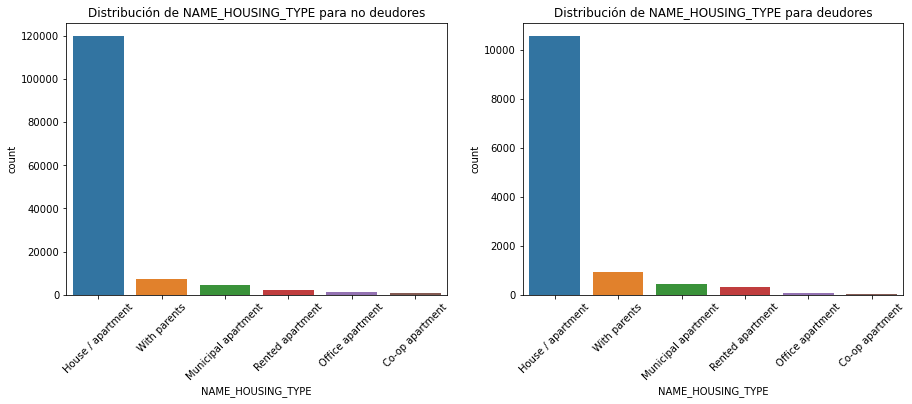

In [188]:
'Las personas casadas son quienes más toman crédito, aunque en proporción los solteros son más propensos a defaultear'


var_graph('NAME_HOUSING_TYPE', label_rotation=True)
                  

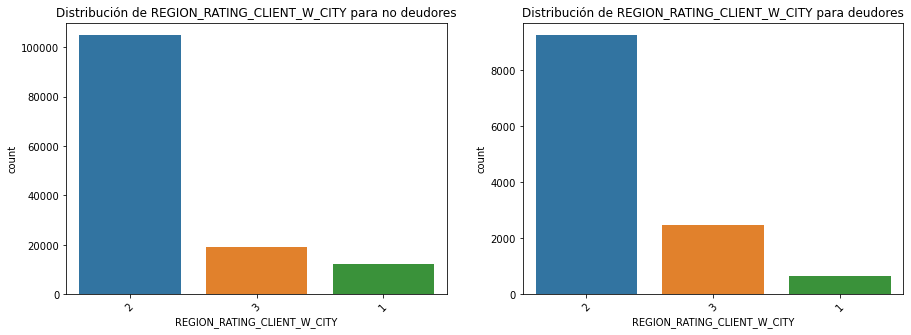

In [189]:
'''Por último, observermos el ranking de la ciudad en donde viven los clientes'''


var_graph('REGION_RATING_CLIENT_W_CITY', label_rotation = True)

In [190]:
'''Podemos observar que los clientes que viven en ciudad de tipo 2 tienen un ratio de default bastante alto, 
al igual que los de tipo 3'''

'Podemos observar que los clientes que viven en ciudad de tipo 2 tienen un ratio de default bastante alto, \nal igual que los de tipo 3'

In [191]:
'''Ahora comenzamos con el análisis bivariado y multivariado'''

'Ahora comenzamos con el análisis bivariado y multivariado'

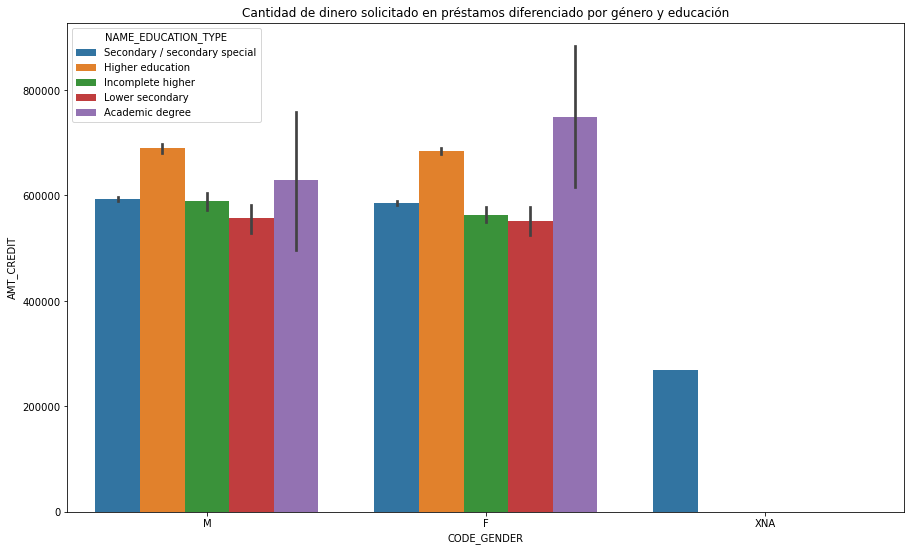

In [192]:
plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.barplot(x = 'CODE_GENDER', y ='AMT_CREDIT',hue = 'NAME_EDUCATION_TYPE',data = df)
plt.title('Cantidad de dinero solicitado en préstamos diferenciado por género y educación');

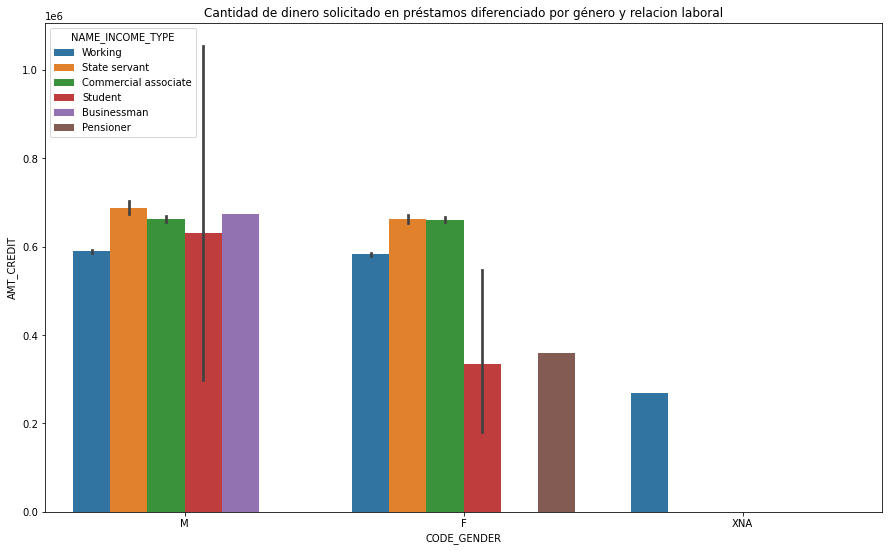

In [193]:
plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.barplot(x = 'CODE_GENDER', y ='AMT_CREDIT',hue = 'NAME_INCOME_TYPE',data = df)
plt.title('Cantidad de dinero solicitado en préstamos diferenciado por género y relacion laboral');

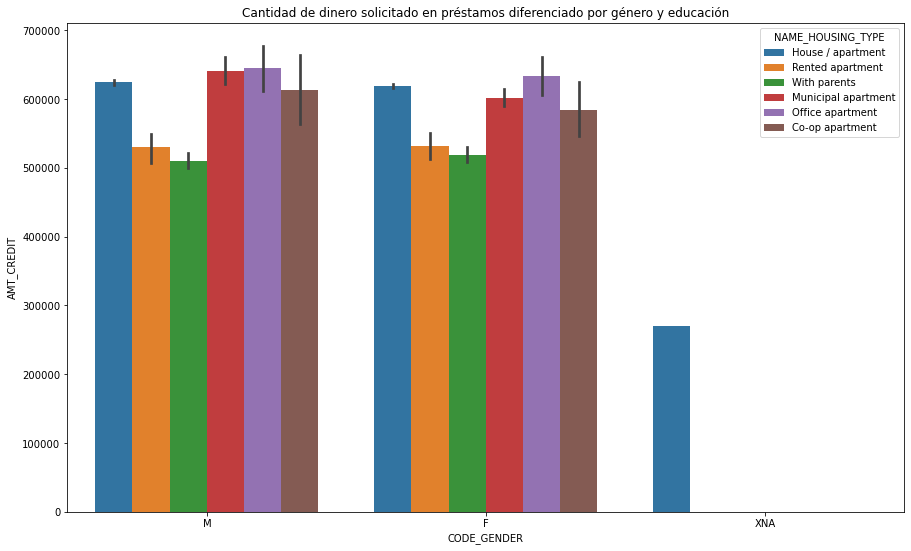

In [194]:
plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.barplot(x = 'CODE_GENDER', y ='AMT_CREDIT',hue = 'NAME_HOUSING_TYPE',data = df)
plt.title('Cantidad de dinero solicitado en préstamos diferenciado por género y educación');

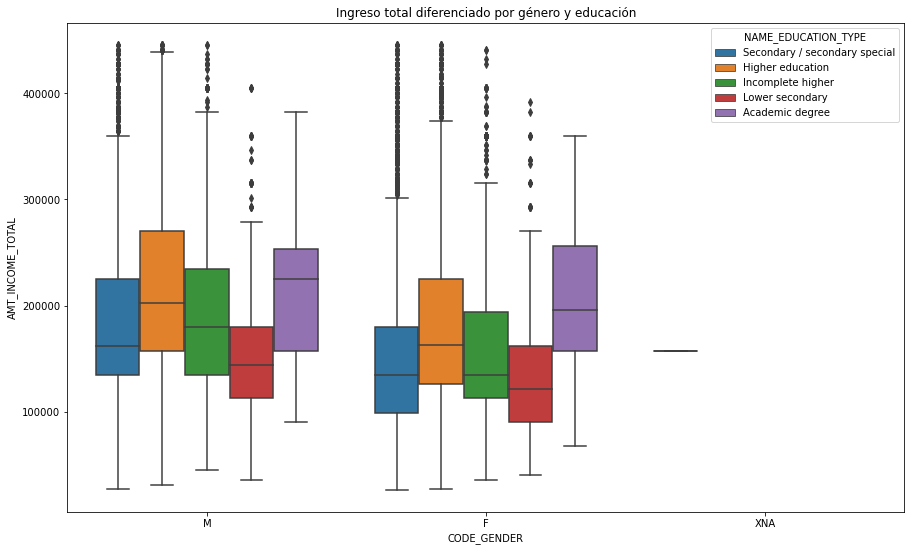

In [195]:
'''Si bien nuestro análisis busca análizar la información en términos de préstamos, también podemos analizar otros aspectos
como los ingresos según educación'''

'''Para el siguiente caso, decidí retirar un outlier, aunque este paso se realizará más adelante'''
df=df[df.AMT_INCOME_TOTAL<np.nanpercentile(df['AMT_INCOME_TOTAL'], 99)]
plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.boxplot(x = 'CODE_GENDER', y ='AMT_INCOME_TOTAL',hue = 'NAME_EDUCATION_TYPE',data = df)
plt.title('Ingreso total diferenciado por género y educación');



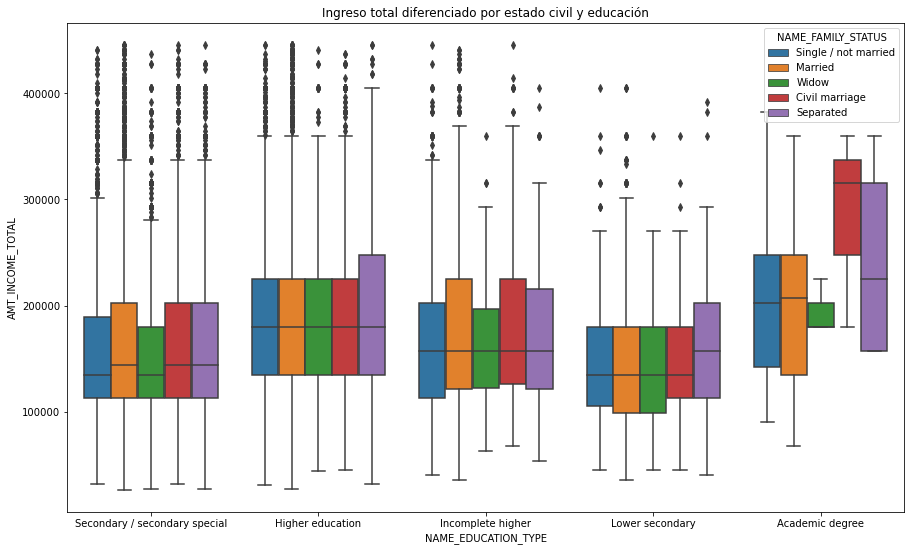

In [196]:
'''En este caso podemos observar que existe una brecha salarial entre géneros ya que la media de los masculinos es más alta'''


plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.boxplot(x = 'NAME_EDUCATION_TYPE', y ='AMT_INCOME_TOTAL',hue = 'NAME_FAMILY_STATUS',data = df)
plt.title('Ingreso total diferenciado por estado civil y educación');

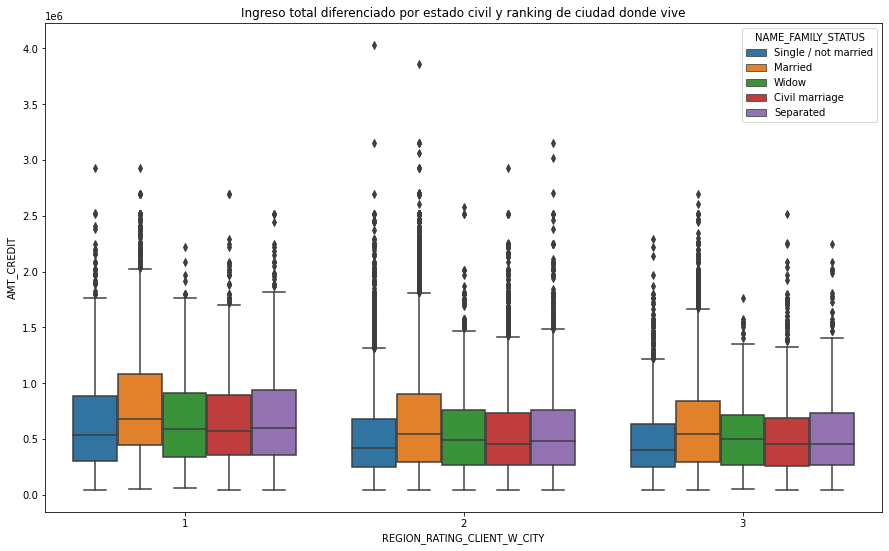

In [197]:
'''En este caso podemos observar que existe una brecha salarial entre géneros ya que la media de los masculinos es más alta'''


plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.boxplot(x = 'REGION_RATING_CLIENT_W_CITY', y ='AMT_CREDIT',hue = 'NAME_FAMILY_STATUS',data = df)
plt.title('Ingreso total diferenciado por estado civil y ranking de ciudad donde vive');

[Text(0, 0, '(F, Married, Secondary / secondary special)'),
 Text(1, 0, '(M, Married, Secondary / secondary special)'),
 Text(2, 0, '(F, Married, Higher education)'),
 Text(3, 0, '(M, Married, Higher education)'),
 Text(4, 0, '(F, Single / not married, Secondary / secondary special)'),
 Text(5, 0, '(F, Civil marriage, Secondary / secondary special)'),
 Text(6, 0, '(M, Single / not married, Secondary / secondary special)'),
 Text(7, 0, '(F, Separated, Secondary / secondary special)'),
 Text(8, 0, '(F, Single / not married, Higher education)'),
 Text(9, 0, '(M, Civil marriage, Secondary / secondary special)')]

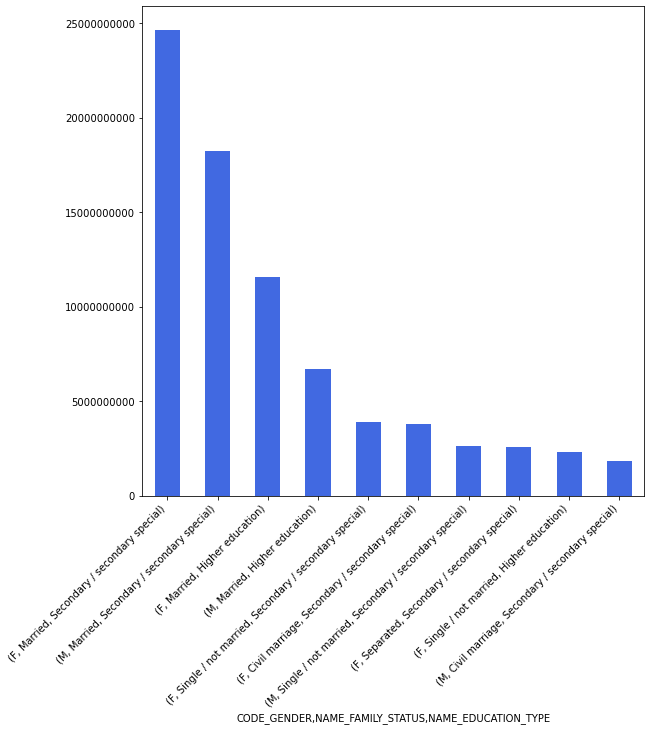

In [198]:
'''Generamos un ranking de personas que más piden prestado dinero por género, estado civil y tipo de educación'''
ax = df.groupby(['CODE_GENDER','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE'])['AMT_CREDIT'].sum().sort_values(ascending=False)[0:10].plot(kind = "bar",figsize=(9,9),color='royalblue')
ax.ticklabel_format(axis="y", style='plain')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

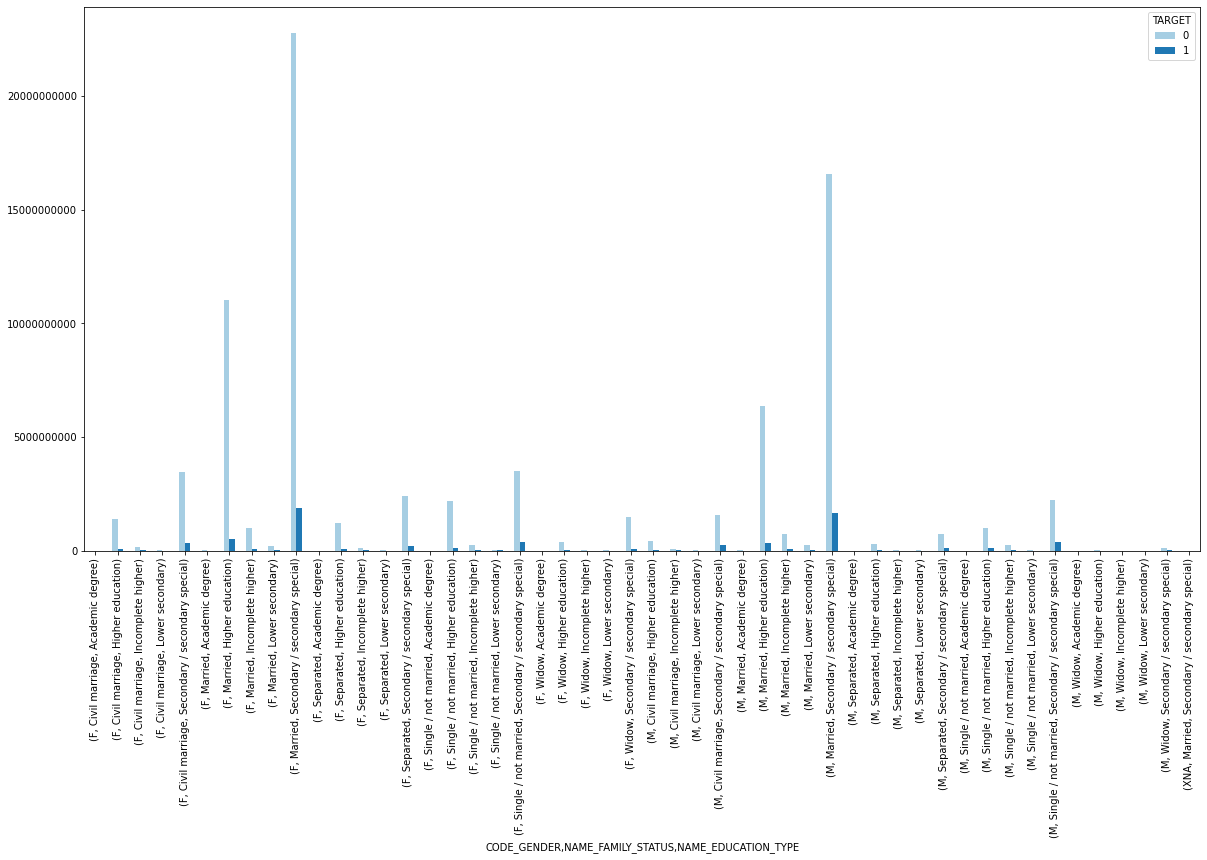

In [199]:
'''Utilizando lo recién visto, podemos observar categorías de personas que mas piden dinero y quienes defaultean más'''


sns.set_palette('Paired')
ax = df.groupby(['CODE_GENDER','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','TARGET'])['AMT_CREDIT'].sum().sort_values(ascending=False).unstack().plot(kind = "bar" , figsize=(20,10))
ax.ticklabel_format(axis="y", style='plain')

<AxesSubplot:xlabel='CODE_GENDER,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE'>

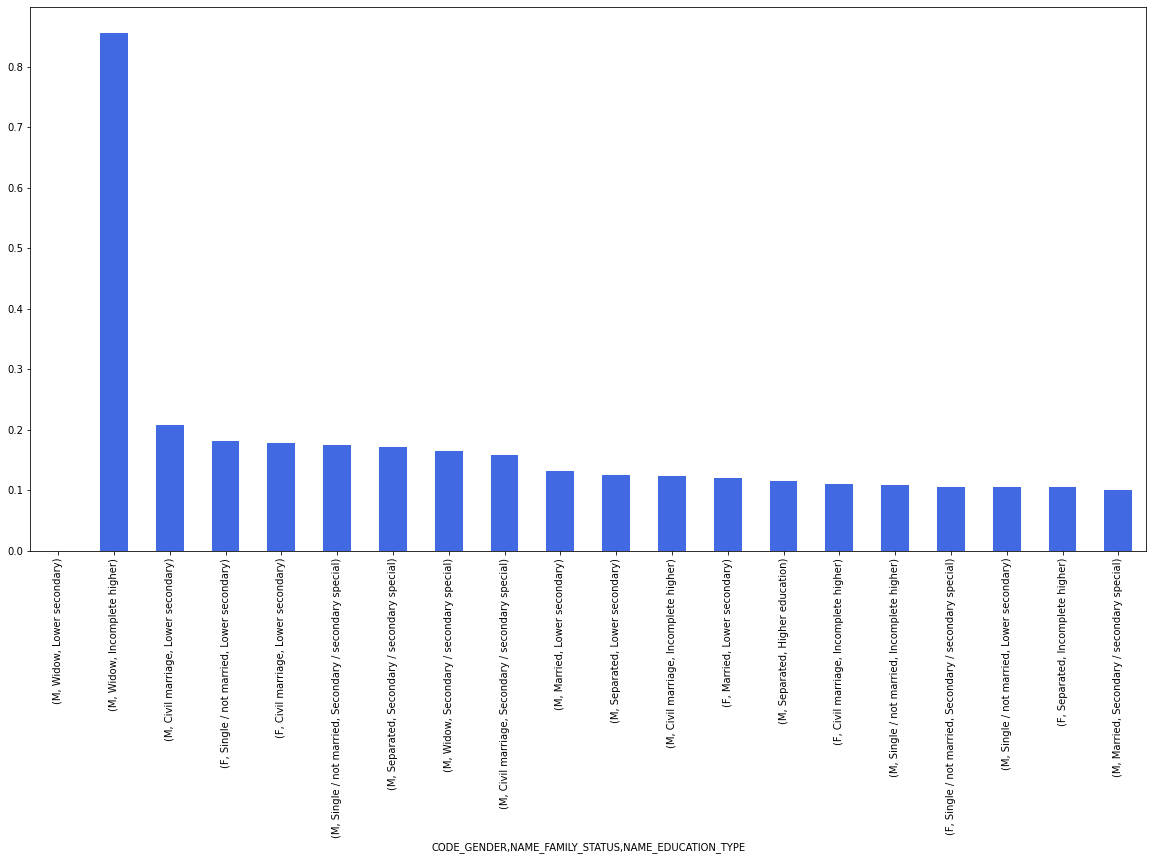

In [200]:
'''Teniendo en cuenta el gráfico anterior, podemos crear un ranking que permita identificar las categorias de personas
menos pagan, pero en forma de porcentaje'''

sns.set_palette("tab10")
ratio = df.groupby(['CODE_GENDER','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','TARGET'])['AMT_CREDIT'].sum().sort_values(ascending=False).unstack()
ratio = ratio.replace(np.NaN,0)
ratio['ratio_target']=ratio[1]/ratio[0]
ratio['ratio_target'].sort_values(ascending=False)[0:20].plot(kind='bar' , figsize=(20,10) , y = 1,color='royalblue')

In [201]:
'''Como conclusión de este gráfico, podemos observar que las primeras categorías pertenecen a los hombres y de educación baja'''

'Como conclusión de este gráfico, podemos observar que las primeras categorías pertenecen a los hombres y de educación baja'

<AxesSubplot:xlabel='CODE_GENDER,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE'>

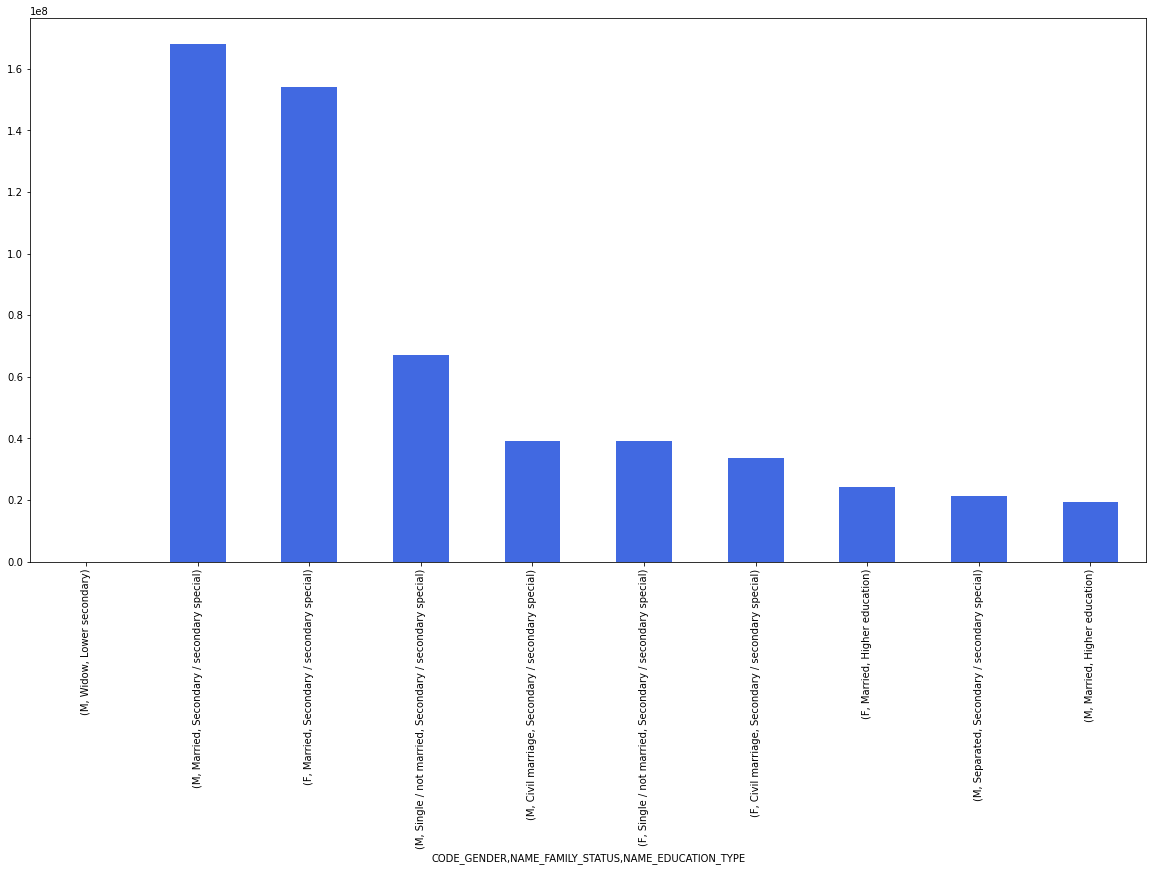

In [202]:
'''Por último, veamos que categorías son lás que más piden dinero y menos pagan'''

#ratio['ratio_target'] = (ratio['ratio_target']-ratio['ratio_target'].min())/(ratio['ratio_target'].max()-ratio['ratio_target'].min())
#ratio[1] = (ratio[1]-ratio[1].min())/(ratio[1].max()-ratio[1].min())
ratio['ratio']=ratio['ratio_target']*ratio[1]
ratio['ratio'].sort_values(ascending=False)[0:10].plot(kind='bar' , figsize=(20,10),color='royalblue')

In [203]:
ratio['ratio_target']

CODE_GENDER  NAME_FAMILY_STATUS    NAME_EDUCATION_TYPE          
F            Civil marriage        Academic degree                  0.000000
                                   Higher education                 0.054100
                                   Incomplete higher                0.109383
                                   Lower secondary                  0.177083
                                   Secondary / secondary special    0.098833
             Married               Academic degree                  0.100265
                                   Higher education                 0.047003
                                   Incomplete higher                0.077785
                                   Lower secondary                  0.119467
                                   Secondary / secondary special    0.082205
             Separated             Academic degree                  0.000000
                                   Higher education                 0.048828
           

<AxesSubplot:>

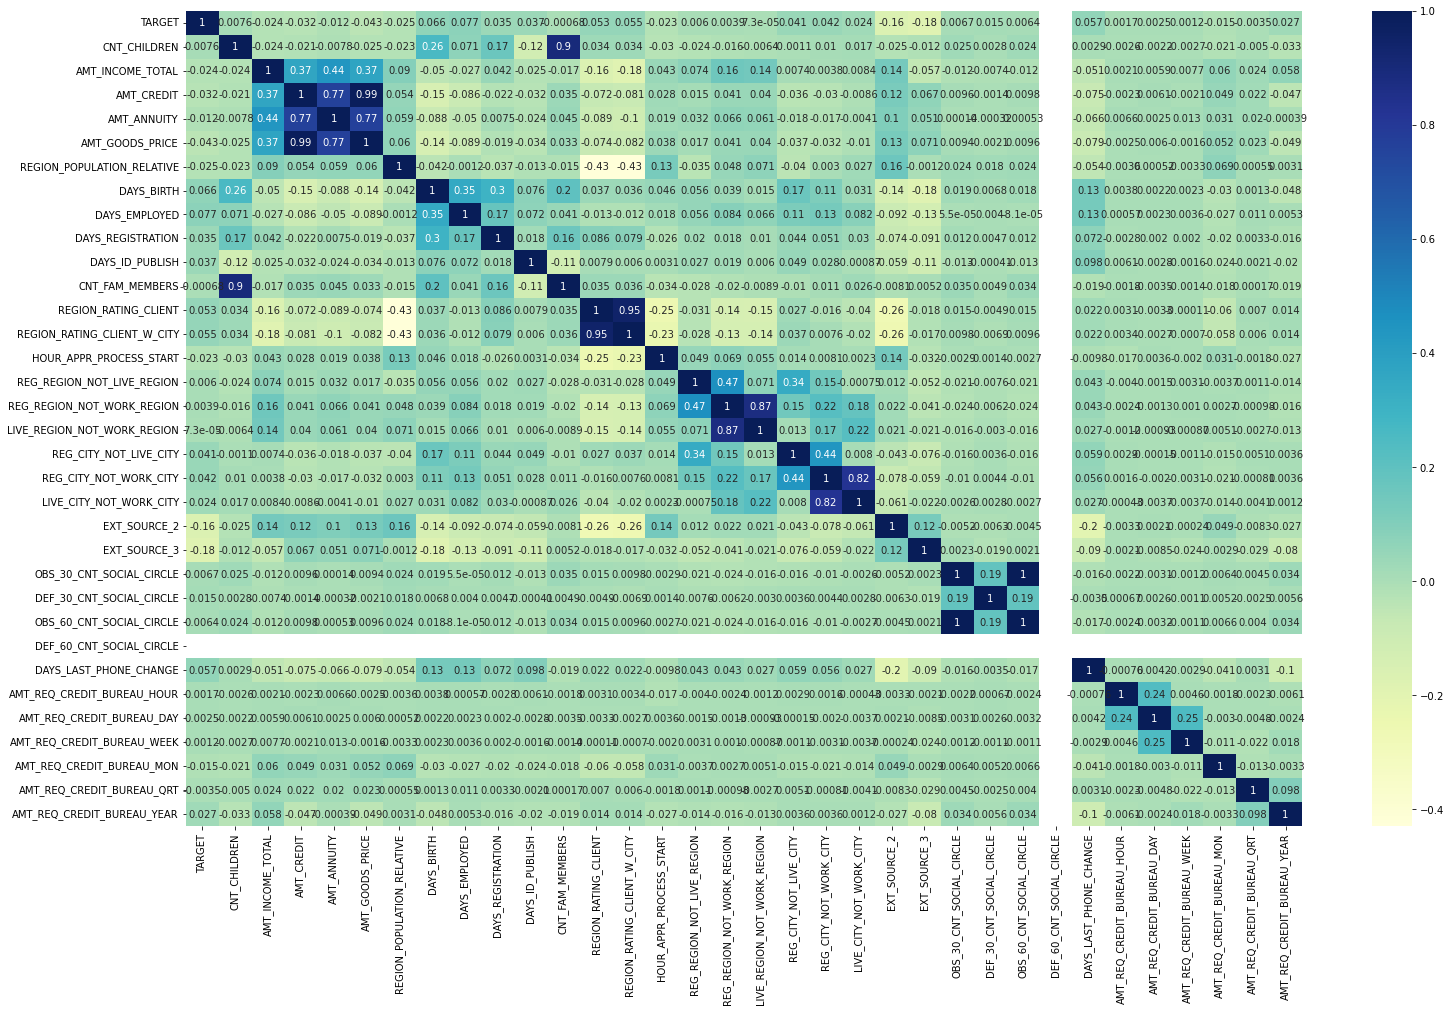

In [204]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu" , ax=ax)

In [205]:
'''Podemos observar que hay variables con correlación alta, pero será un problema ya que son variables similares'''


'Podemos observar que hay variables con correlación alta, pero será un problema ya que son variables similares'

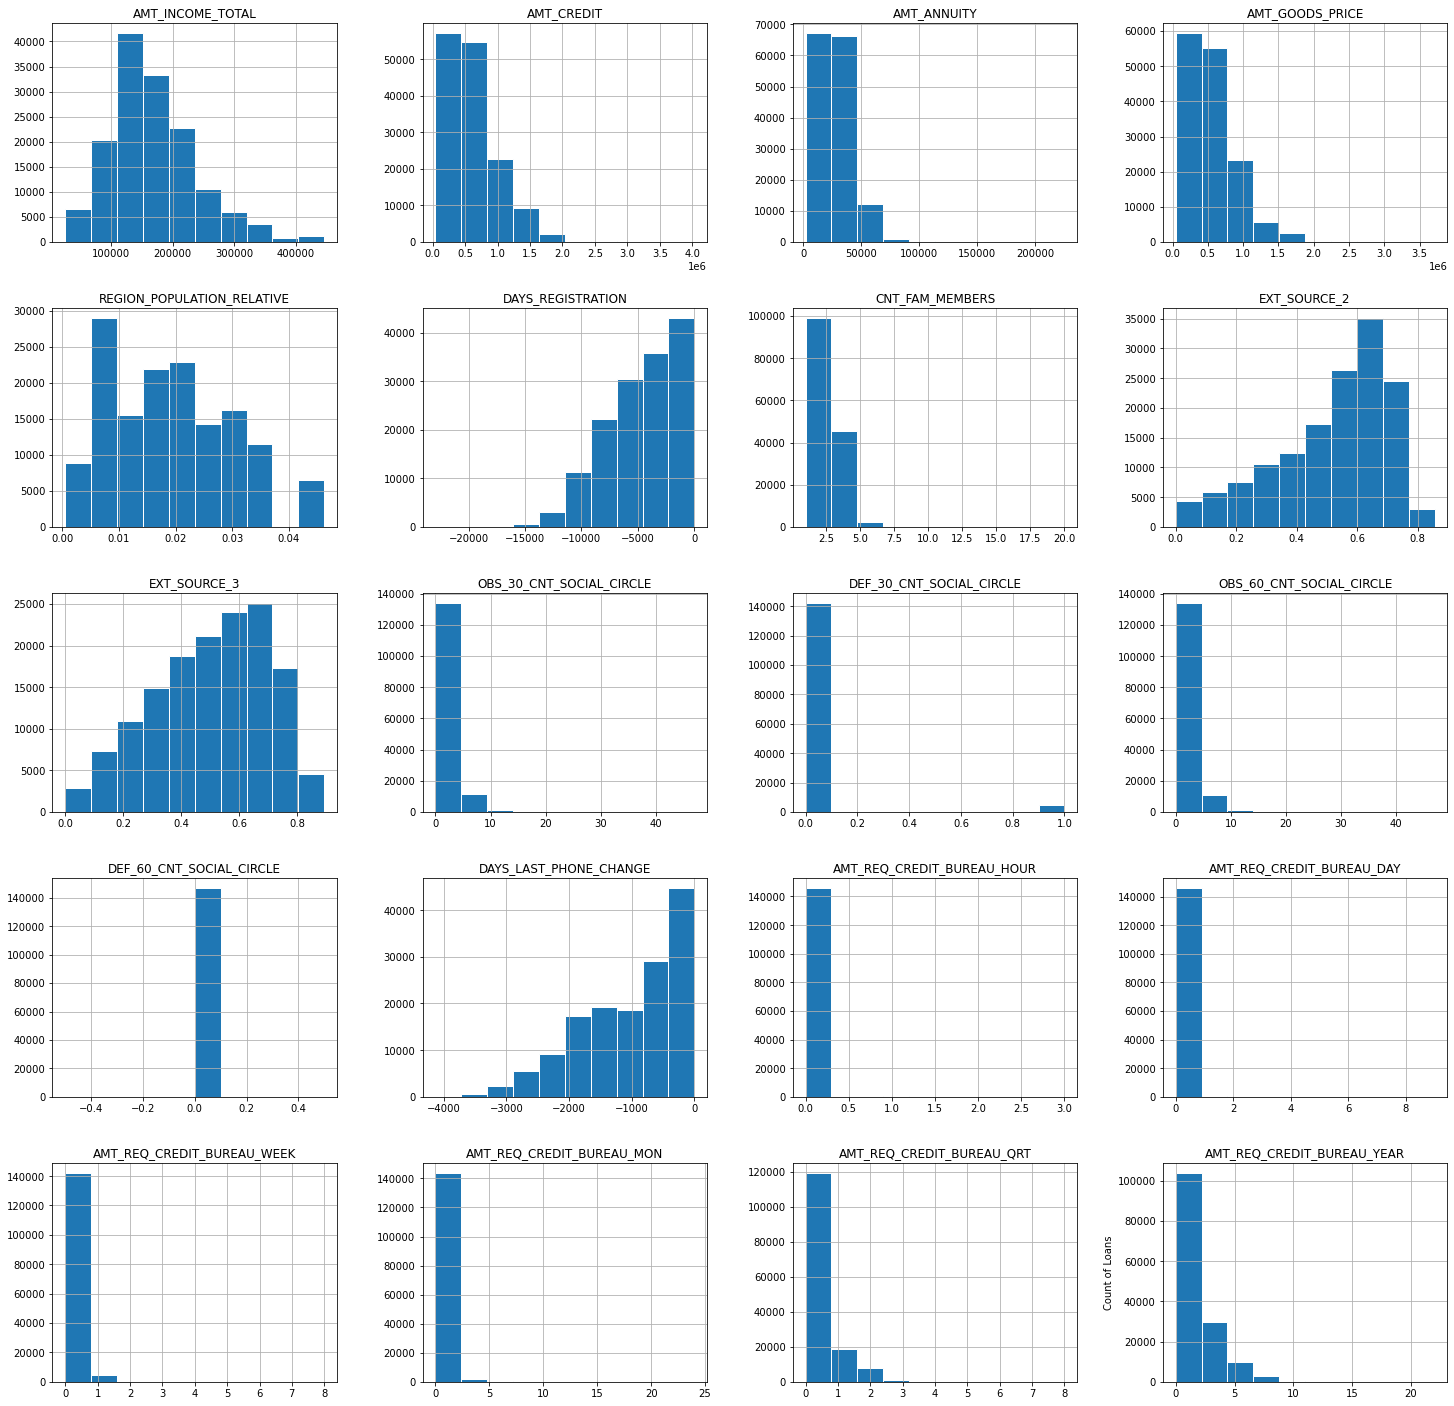

In [206]:
df.select_dtypes('float').hist(figsize=(25,25), ec='w')
plt.ylabel("Count of Loans")
plt.show()

In [207]:
'''Por último ,observamos la distribución de las varibles'''

'Por último ,observamos la distribución de las varibles'

In [208]:
'''Convertimos las variables categoricas en dummies'''
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].round(decimals = 2)
df['DAYS_BIRTH'] = df['DAYS_BIRTH']/365*-1

df_category = df.select_dtypes(include=object).columns.tolist()
for category in df_category:
    df1 = pd.get_dummies(df[category])
    df = pd.concat([df, df1], axis=1).reindex(df.index)
    df.drop(category, axis=1, inplace=True)


In [209]:
'''Clasificamos los datos en X e Y'''
y = (df['TARGET'])
X = np.array(df.drop(['TARGET'],axis = 1))

In [210]:
'''Creamos una función en donde se guarden los modelos de los resultados, en el caso de Standard se correrá con class_weight = 
"balanced" siempre y cuando el modelo lo permita, ya que al estar la clase target desbalanceada el modelo clasificara
todo como no fraude, además se eligieron algunos parámetros al azar ya que luego se optimizaran

Además, se agrego una tabla de "recall" ya que esta será la métrica de interés, el recall de la clase 1 ya que buscamos
minimizar los falsos negativos, en este caso clasificar fraude cuando es no fraude y maximizar los verdaderos negativos, 
decir los verdaderos fraudes'''

modelos = ['LogReg', 'DT', 'RF','CB', 'LGBM']
Acc_Table = pd.DataFrame(columns = modelos)
Acc_Table.loc['Standard'] = [0,0,0,0,0]
Acc_Table.loc['SMOTE'] = [0,0,0,0,0]
Acc_Table.loc['GridSearch'] = [0,0,0,0,0]
Acc_Table.loc['RandomSearch'] = [0,0,0,0,0]
Acc_Table.head()

Rec_Table = pd.DataFrame(columns = modelos)
Rec_Table.loc['Standard'] = [0,0,0,0,0]
Rec_Table.loc['SMOTE'] = [0,0,0,0,0]
Rec_Table.loc['GridSearch'] = [0,0,0,0,0]
Rec_Table.loc['RandomSearch'] = [0,0,0,0,0]
Rec_Table.head()


,LogReg,DT,RF,CB,LGB
Standard,0,0,0,0,0
SMOTE,0,0,0,0,0
GridSearch,0,0,0,0,0
RandomSearch,0,0,0,0,0


In [211]:
'''Dividimos los datos y utilizamos 70% de los mismos para el entrenamiento y 30% como test'''
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size= 0.3, random_state = 42)

In [223]:
LogReg = LogisticRegression(solver='liblinear', class_weight = "balanced")
DT    = DecisionTreeClassifier(class_weight = "balanced", max_depth = 4)
RF    = RandomForestClassifier(class_weight = "balanced", max_depth = 4)
LGBM   = lgb.LGBMClassifier(class_weight = "balanced", num_leaves = 4, max_depth = 4)
CB = CatBoostClassifier(iterations=2,learning_rate=1,depth=2)

models = [LogReg, DT, RF, CB, LGBM]


col = 0
for model in models:
    model.fit(X_train,y_train.values.ravel())
    Acc_Table.iloc[0,col] = model.score(X_test,y_test)
    predic = model.predict(X_test)
    report = (classification_report(y_test, predic, output_dict=True))
    Rec_Table.iloc[0,col] = report['1']['recall'] 
    #print(model)
    #print(confusion_matrix(y_test, predic))
    
    col += 1
    

    
print('Accuracy')
print(Acc_Table.head()    )
print(" ")
print('Recall')
print(Rec_Table.head())

0:	learn: 0.2803504	total: 11.3ms	remaining: 11.3ms
1:	learn: 0.2692506	total: 20.3ms	remaining: 0us


C:\Users\julia\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy
                LogReg        DT        RF        CB       LGB
Standard      0.579484  0.638438  0.686492  0.916542  0.691352
SMOTE         0.597425  0.772176  0.867625  0.774129  0.916519
GridSearch           0         0         0         0         0
RandomSearch         0         0         0         0         0
 
Recall
                LogReg        DT        RF        CB       LGB
Standard      0.596735  0.688707  0.649524       0.0  0.674014
SMOTE         0.559728  0.360816  0.173878  0.428027       0.0
GridSearch           0         0         0         0         0
RandomSearch         0         0         0         0         0


In [224]:
'''Existen diferentes formas de tratar las clases desbalanceada, en este caso aplicaremos Smote, el cual implica un subsampling
y oversampling de los datos'''

sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [225]:
'''Corremos los modelos con SMOTE aplicado'''

LogReg = LogisticRegression(solver = 'liblinear',class_weight = "balanced")
DT    = DecisionTreeClassifier(class_weight = "balanced", max_depth = 4)
RF    = RandomForestClassifier(class_weight = "balanced", max_depth = 4, min_samples_leaf = 4, min_samples_split = 5)
LGBM   = lgb.LGBMClassifier(class_weight = "balanced", num_leaves = 4, max_depth = 4)
CB = CatBoostClassifier(iterations=2,learning_rate=1,depth=2)
models = [LogReg, DT, RF,CB, LGBM]

col = 0
for model in models:
    model.fit(X_smote,y_smote.values.ravel())
    Acc_Table.iloc[1,col] = model.score(X_test,y_test)
    predic = model.predict(X_test)
    report = (classification_report(y_test, predic, output_dict=True))
    Rec_Table.iloc[1,col] = report['1']['recall'] 
    #print(model)
    #print(confusion_matrix(y_test, predic))
    
    col += 1
    
print('Accuracy')
print(Acc_Table.head()    )
print(" ")
print('Recall')
print(Rec_Table.head())

0:	learn: 0.5449319	total: 28.7ms	remaining: 28.7ms
1:	learn: 0.4803331	total: 60.4ms	remaining: 0us
Accuracy
                LogReg        DT        RF        CB       LGB
Standard      0.579484  0.638438  0.686492  0.916542  0.691352
SMOTE         0.597425  0.772176  0.862697  0.774129  0.916519
GridSearch           0         0         0         0         0
RandomSearch         0         0         0         0         0
 
Recall
                LogReg        DT        RF        CB       LGB
Standard      0.596735  0.688707  0.649524       0.0  0.674014
SMOTE         0.559728  0.360816  0.195102  0.428027       0.0
GridSearch           0         0         0         0         0
RandomSearch         0         0         0         0         0


In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
'''Para optimizar nuestro modelo, podemos encontrar los mejores parámetros utilizando GridSearchCV,'''

#Decision Tree
DT_grid = {"max_depth": [1,2,3,4,5,6], "max_features": [1,3,4,5,7,8,9], "min_samples_leaf": [1,3,4,5,6,7],"criterion": ["gini", "entropy"]}

#Logistic Regression
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solvers = ['liblinear', 'saga']
LogReg_grid = dict(solver=solvers,penalty=penalty,C=C)

RF_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

#LGB
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,50,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
LGB_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate)

#CatBoost
depth=[3,4,5],
n_estimators=[100,200,300]

CB_grid =dict(max_depth = depth, n_estimators=n_estimators)


In [ ]:
LogReg = LogisticRegression()
DT    = DecisionTreeClassifier()
RF    = RandomForestClassifier()
LGB   = lgb.LGBMClassifier()
CB = CatBoostClassifier()

models = [LogReg, DT, RF,CB, LGB]
grids = [LogReg_grid,DT_grid,RF_grid,CB_grid,LGB_grid]

col = 0
from sklearn.model_selection import RepeatedStratifiedKFold
for ind in range(0,3):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    grid_search = GridSearchCV(estimator=models[col], 
                  param_grid=grids[col], n_jobs=-1, cv=cv  
                  ,scoring='recall',error_score=0)
    grid_clf_acc = grid_search.fit(X_smote, y_smote)
    #joblib.dump(grid_clf_acc.best_estimator_, ('modelo1.pkl'))
    predic = grid_clf_acc.predict(X_test)
    report = (classification_report(y_test, predic, output_dict=True))
    Rec_Table.iloc[2,col] = report['1']['recall'] 
    Acc_Table.iloc[2,col] = report['macro avg']['precision']
    print(grid_clf_acc.best_params_)
    joblib.dump(grid_clf_acc.best_params_, ('modelo'+str(ind)+'.pkl'))
    col += 1

print('Accuracy')
print(Acc_Table.head()    )
print(" ")
print('Recall')
print(Rec_Table.head())



In [ ]:
'''Los mejores parámetros para los modelos son los siguientes:
Regresión logística: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, obteniendo como Acc: 0.564578 y recall 0.68084
DT: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 3}, obteniendo como Acc: 0.564578 y recall 0.68084
LGBM = 'boosting_type': 'goss', 'class_weight': None, 'learning_rate': 0.20000000000000004, 'num_leaves': 150''' 

In [229]:
'''Para optimizar recursos, podemos utilizar randomized search cv el cual encontrará el mejor modelo luego de x iteraciones'''
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
models = [LogReg, DT, RF, CB, LGB]
models = [RF]

grids = [LogReg_grid,DT_grid,RF_grid,CB_grid,LGB_grid]
grids = [RF_grid]
col = 0

for ind in range(0,1):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(models[col], 
                param_distributions=grids[col],n_iter=n_iter_search)
                #,cv=cv)
    random_search_acc = random_search.fit(X_smote, y_smote)
    Acc_Table.iloc[3,col] = random_search_acc.score(X_test,y_test)    
    predic = random_search_acc.predict(X_test)
    report = (classification_report(y_test, predic, output_dict=True))
    Rec_Table.iloc[3,col] = report['1']['recall'] 
    col += 1
print('Accuracy')
print(Acc_Table.head()    )
print(" ")
print('Recall')
print(Rec_Table.head())

KeyboardInterrupt: 

In [ ]:
'''Conclusiones:
    

Creo que un dato como motivo del préstamos podría influir mucho en la detección de casos de fraude, aunque puede ser dificil
que todos los clientes completen estos datos

Un dato que sería interesante de análizar sería la tasa de interés, ya que la integración del mismo podría aportar más datos
al análisis, además, este dato permitiría entender como cubrirse de las personas que no pagan, la solución más acertada sería
reducir el monto de los préstamos, pero tal vez reduciendo la tasa de ciertas clases de personas
podrían reducir los casos de fraude

Las personas con menor educación tienden a pagar menos los préstamos

Los hombres tienen más tendencia a no pagar los préstamos

Se debe reducir el monto prestado a las categorías 
- Masculinos, casados y educación secundaria
- Femenino, casado, educación secundaria
ya que son los que menos pagan y más piden dinero

Si bien el desbalanceo de clases puede ser tratado con SMOTE o diferentes técnicas, lo más optimo es conseguir más muestras
del tipo "no fraude" ya que de esa forma no se realizan modificaciones sobre los datos

Si bien no llegamos a un resultado deseado con los modelos y métricas, es posible optimizarlo aún más con optimización bayesiana,
mejorar un modelo implica un uso elevado computacional y es bueno utilizar herramientas como reducción de dimensionalidad para
realizar estos procesos en menores tiempos.'''